In [2]:
import pandas as pd


In [3]:
input_folder = "/data/home/natant/Negatives/Data/Encode690/ENCODE_hg38_subset_celltype_merged"

In [4]:
import pybedtools
import os

# Get the list of ChIP files in the input folder
chip_files = [f for f in os.listdir(input_folder) if f.endswith('_concatenated.narrowPeak')]

# Take the first file
first_chip_file = os.path.join(input_folder, chip_files[1])

# Load the file using pybedtools
bed = pybedtools.BedTool(first_chip_file)

# Merge peaks with a maximum of 40 bp overlap allowed before merging
merged_bed = bed.merge(d=-40)

# Calculate the number of original peaks and merged peaks
original_peak_count = len(bed)
merged_peak_count = len(merged_bed)

# Calculate the number of overlapping peaks
overlapping_peak_count = original_peak_count - merged_peak_count

# Calculate the percentage of overlapping peaks
overlapping_peak_percentage = (overlapping_peak_count / original_peak_count) * 100

print(f"Total number of peaks: {original_peak_count}")
print(f"Number of overlapping peaks: {overlapping_peak_count}")
print(f"Percentage of overlapping peaks: {overlapping_peak_percentage:.2f}%")

Total number of peaks: 346656
Number of overlapping peaks: 227950
Percentage of overlapping peaks: 65.76%


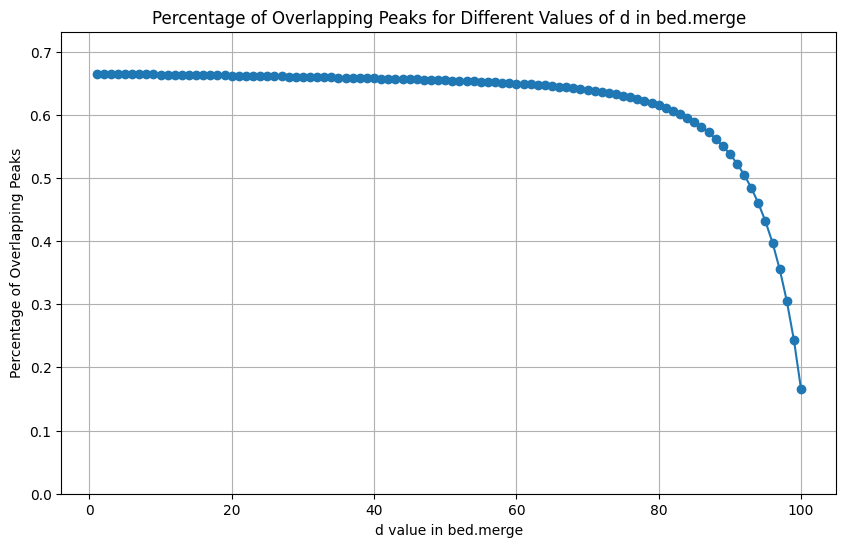

In [5]:
import matplotlib.pyplot as plt

# Initialize lists to store the results
d_values = list(range(1, 101))
overlapping_percentages = []

# Loop through each value of d and calculate the overlapping percentage
for d in d_values:
    merged_bed = bed.merge(d=-d)
    merged_peak_count = len(merged_bed)
    overlapping_peak_count = original_peak_count - merged_peak_count
    overlapping_peak_percentage = (overlapping_peak_count / original_peak_count)
    overlapping_percentages.append(overlapping_peak_percentage)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(d_values, overlapping_percentages, marker='o')
plt.xlabel('d value in bed.merge')
plt.ylabel('Percentage of Overlapping Peaks')
plt.title('Percentage of Overlapping Peaks for Different Values of d in bed.merge')
plt.grid(True)
plt.ylim(0,max(overlapping_percentages) * 1.1)
plt.show()

In [ ]:
from tqdm import tqdm

def get_unique_tfs_from_file(file_path):
    with open(file_path, 'r') as file:
        tfs = set(line.split()[3] for line in file)
    return len(tfs)

# Initialize a figure for subplots
fig, axes = plt.subplots(len(chip_files), 1, figsize=(10, len(chip_files) * 5), sharex=True)

# Loop through each ChIP file and generate the plot
for i, chip_file in enumerate(tqdm(chip_files, desc="Processing ChIP files")):
    # Load the file using pybedtools
    bed = pybedtools.BedTool(os.path.join(input_folder, chip_file))
    
    # Initialize lists to store the results
    overlapping_percentages = []

    # Loop through each value of d and calculate the overlapping percentage
    for d in d_values:
        merged_bed = bed.merge(d=-d)
        merged_peak_count = len(merged_bed)
        overlapping_peak_count = len(bed) - merged_peak_count
        overlapping_peak_percentage = (overlapping_peak_count / len(bed))
        overlapping_percentages.append(overlapping_peak_percentage)

    # Get the cell type from the file name
    cell_type = chip_file.split("_")[0]
    
    # Get the number of unique TFs for the cell type
    unique_tfs = get_unique_tfs_from_file(os.path.join(input_folder, chip_file))

    # Plot the results
    axes[i].plot(d_values, overlapping_percentages, marker='o')
    axes[i].set_ylabel('Percentage of Overlapping Peaks')
    axes[i].set_title(f'Cell Type: {cell_type} (Unique TFs: {unique_tfs})')
    axes[i].grid(True)
    axes[i].set_ylim(0, max(overlapping_percentages) * 1.1)

# Set common labels
axes[-1].set_xlabel('d value in bed.merge')

plt.tight_layout()
plt.show()


Processing ChIP files:  44%|████▍     | 4/9 [25:51<39:46, 477.24s/it]

In [1]:
merged_bed

NameError: name 'merged_bed' is not defined